In [6]:
from superfv import AdvectionSolver, initial_conditions
from functools import partial
import matplotlib.pyplot as plt
import numpy as np

In [7]:
solver = AdvectionSolver(
    ic=partial(initial_conditions.square, vx=2, vy=1),
    nx=32,
    ny=32,
    p=3,
    interpolation_scheme="gauss-legendre",
    # MOOD=True,
    # NAD=1e-5,
    # PAD={"rho": (0, 1)},
    # adaptive_timestepping=False,
    cupy=True,
)
solver.run(1.0, q_max=2)

/Users/jonathan/Desktop/superfv/superfv/finite_volume_solver.py:667: UserWarning: CuPy is not available. Using NumPy instead.
  warnings.warn("CuPy is not available. Using NumPy instead.")
100%|██████████| 1.0/1.0 [00:02]                 


/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Coordinate 0.5 not found in array. Using nearest: 0.484375.
  warnings.warn(


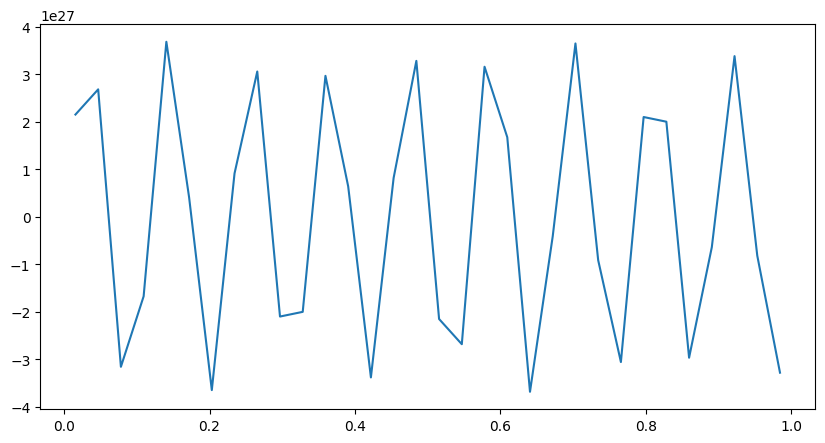

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
solver.plot_1d_slice(ax, "rho", x=None, y=0.5)

In [9]:
print(np.min(solver.minisnapshots["min_rho"]), np.max(solver.minisnapshots["max_rho"]))

-3.85458996477441e+27 3.854589964774392e+27


In [10]:
print(solver.timer.report())

Category                                               Calls      Cumulative Time
-----------------------------------------------------------------------------------
!FiniteVolumeSolver.run                                    1                 2.09
AdvectionSolver.advection_upwind                         726                 0.07
AdvectionSolver.compute_dt                               363                 0.02
AdvectionSolver.minisnapshot                             122                 0.01
ExplicitODESolver.integrate                                1                 2.09
ExplicitODESolver.integrate.body                           1                 2.08
ExplicitODESolver.minisnapshot                           122                 0.00
FiniteVolumeSolver.apply_bc                             2543                 0.38
FiniteVolumeSolver.compute_dt_and_fluxes                 363                 1.87
FiniteVolumeSolver.compute_numerical_fluxes              726                 0.25
FiniteVolumeSo